<a href="https://colab.research.google.com/github/RohanMacherla/ANN_Micro_Project/blob/main/Liver_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Liver_Disease_data.csv')

In [ ]:
df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinine,gamma_glutamyl_transferase,protein
0,no_disease,32.00,m,38.50,52.50,7.70,22.10,7.50,6.93,3.23,106.00,12.10,69.00
1,no_disease,32.00,m,38.50,70.30,18.00,24.70,3.90,11.17,4.80,74.00,15.60,76.50
2,no_disease,32.00,m,46.90,74.70,36.20,52.60,6.10,8.84,5.20,86.00,33.20,79.30
3,no_disease,32.00,m,43.20,52.00,30.60,22.60,18.90,7.33,4.74,80.00,33.80,75.70
4,no_disease,32.00,m,39.20,74.10,32.60,24.80,9.60,9.15,4.32,76.00,29.90,68.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100197,no_disease,50.06,m,40.32,70.51,46.42,32.07,6.91,7.95,3.93,76.87,16.90,69.04
100198,cirrhosis,63.88,f,28.96,87.10,3.61,99.00,47.85,1.57,3.56,66.53,64.09,82.01
100199,no_disease,37.02,m,44.82,94.19,32.13,36.80,6.06,9.67,4.25,113.11,23.86,72.43
100200,no_disease,51.01,f,41.42,136.96,32.96,20.02,5.06,10.23,6.30,77.04,106.73,72.20


In [ ]:
df.isnull().sum()

,0
category,0
age,0
sex,0
albumin,122
alkaline_phosphatase,2858
alanine_aminotransferase,178
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,1545


In [ ]:
print(df['alkaline_phosphatase'].nunique())
print(df['alanine_aminotransferase'].nunique())
print(df['albumin'].nunique())
print(df['cholesterol'].nunique())
print(df['protein'].nunique())

8156
6413
3161
813
2869


<Axes: xlabel='alkaline_phosphatase', ylabel='Count'>

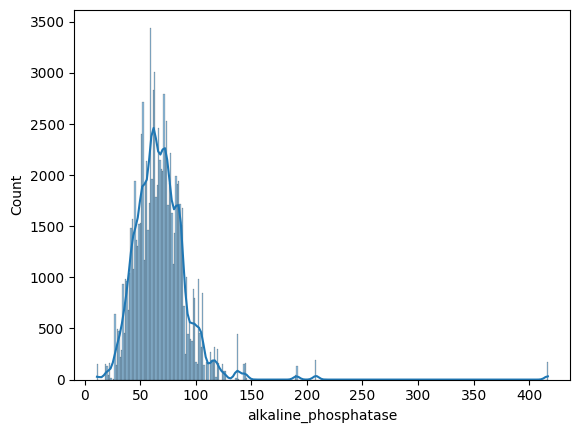

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['alkaline_phosphatase'], kde=True)

<Axes: xlabel='albumin', ylabel='Count'>

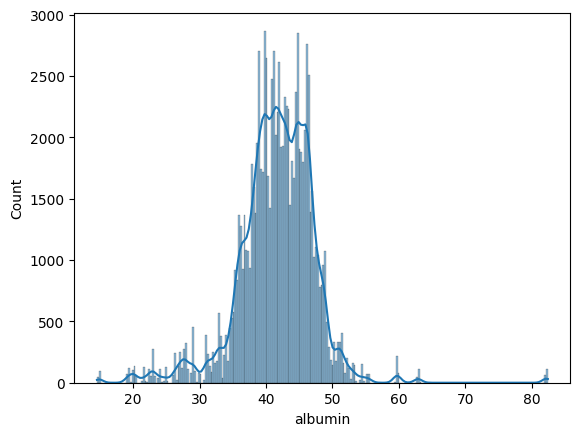

In [ ]:
sns.histplot(df['albumin'], kde=True)

<Axes: xlabel='alanine_aminotransferase', ylabel='Count'>

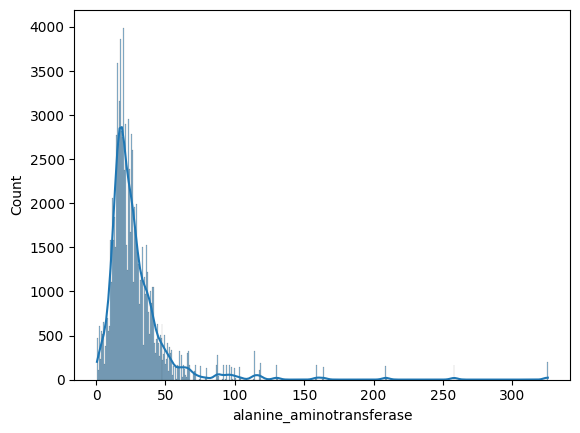

In [ ]:
sns.histplot(df['alanine_aminotransferase'], kde=True)

<Axes: xlabel='cholesterol', ylabel='Count'>

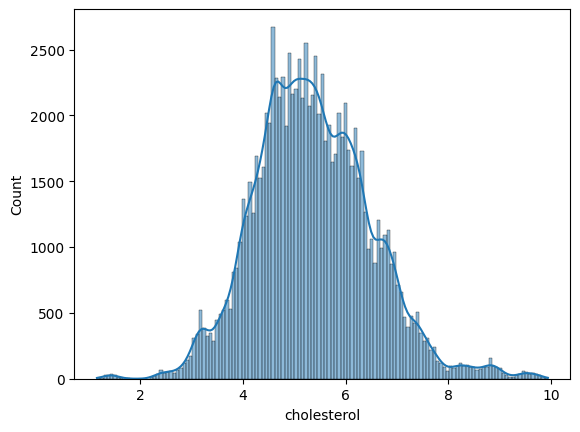

In [ ]:
sns.histplot(df['cholesterol'],kde=True)

<Axes: xlabel='protein', ylabel='Count'>

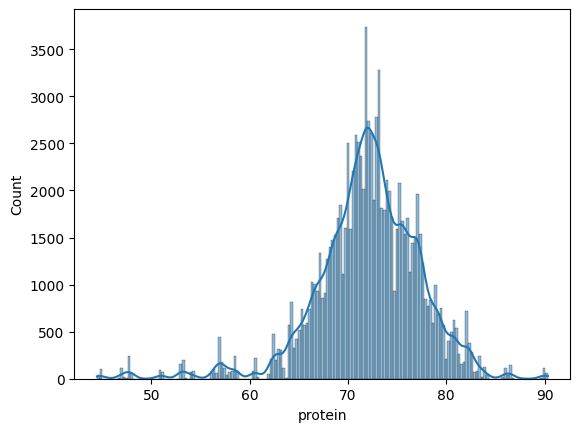

In [ ]:
sns.histplot(df['protein'],kde=True)

In [ ]:
df['albumin'] = df['albumin'].fillna(df['albumin'].mean())

In [ ]:
df['alkaline_phosphatase'] = df['alkaline_phosphatase'].fillna(df['alkaline_phosphatase'].median())

In [ ]:
df['alanine_aminotransferase'] = df['alanine_aminotransferase'].fillna(df['alanine_aminotransferase'].median())

In [ ]:
df['cholesterol'] = df['cholesterol'].fillna(df['cholesterol'].mean())

In [ ]:
df['protein'] = df['protein'].fillna(df['protein'].median())

In [ ]:
df.isnull().sum()

,0
category,0
age,0
sex,0
albumin,0
alkaline_phosphatase,0
alanine_aminotransferase,0
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,0


<Axes: >

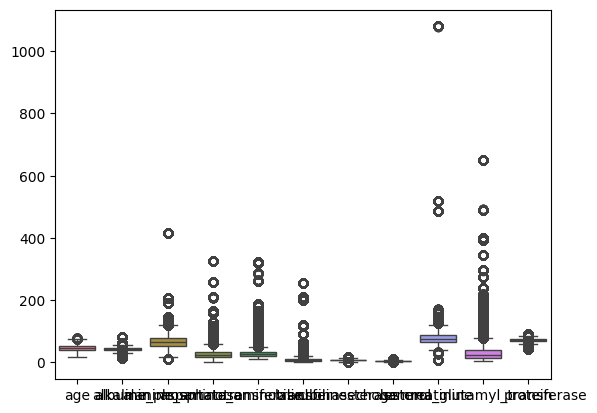

In [ ]:
sns.boxplot(df)

<Axes: ylabel='protein'>

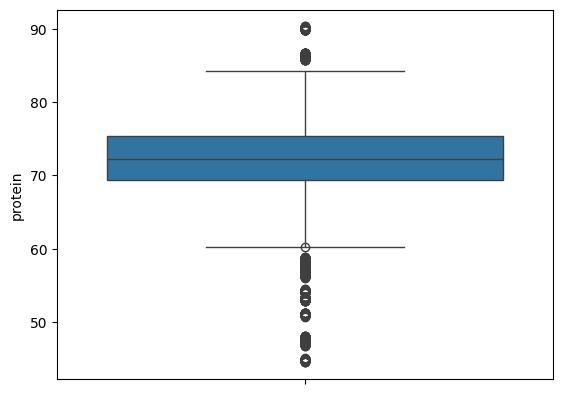

In [ ]:
sns.boxplot(df['protein'])

In [ ]:
df['category'].unique()

array([' no_disease', 'suspect_disease', ' hepatitis', ' fibrosis',
       ' cirrhosis'], dtype=object)

In [ ]:
outlier_columns = ['age','alkaline_phosphatase', 'albumin', 'alanine_aminotransferase','aspartate_aminotransferase','bilirubin','cholinesterase','cholesterol','creatinine', 'protein','gamma_glutamyl_transferase']


In [ ]:
import numpy as np
for col in outlier_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound,df[col]))

In [ ]:
df['category'].unique()

array([' no_disease', 'suspect_disease', ' hepatitis', ' fibrosis',
       ' cirrhosis'], dtype=object)

In [ ]:
df.shape

(100202, 13)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

In [ ]:
df['category'].unique()

array([' no_disease', 'suspect_disease', ' hepatitis', ' fibrosis',
       ' cirrhosis'], dtype=object)

In [ ]:
X = df.drop('category', axis=1)
y = df['category']

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
y_encode = le.fit_transform(y)
y_cat = to_categorical(y_encode)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [ ]:
y_cat

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
y_cat[0]

array([0., 0., 0., 1., 0.])

In [ ]:
y_cat.shape

(100202, 5)

In [ ]:
X_train.shape

(80161, 12)

In [ ]:
y_train.shape

(80161, 5)

In [ ]:
X_test.shape

(20041, 12)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
model=Sequential()
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(16,kernel_initializer='random_uniform',activation='relu'))
model.add(Dense(32,kernel_initializer='random_uniform',activation='relu'))
model.add(Dense(64,kernel_initializer='random_uniform',activation='relu'))
model.add(Dense(128,kernel_initializer='random_uniform',activation='relu'))
model.add(Dense(5,kernel_initializer='random_uniform',activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,869 (46.36 KB)

 Trainable params: 11,869 (46.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience = 4,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
checkpoint = ModelCheckpoint(
    'Chrun_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [ ]:
histroy = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=64,
    epochs=20,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/20
 998/1002 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8672 - loss: 0.5767
Epoch 1: val_loss improved from inf to 0.27461, saving model to Chrun_model.keras
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8673 - loss: 0.5760 - val_accuracy: 0.9104 - val_loss: 0.2746
Epoch 2/20
 985/1002 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9067 - loss: 0.2852
Epoch 2: val_loss improved from 0.27461 to 0.19351, saving model to Chrun_model.keras
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9068 - loss: 0.2848 - val_accuracy: 0.9356 - val_loss: 0.1935
Epoch 3/20
 995/1002 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9273 - loss: 0.2156
Epoch 3: val_loss improved from 0.19351 to 0.18589, saving model to Chrun_model.keras
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9273 - loss: 0.2156 - val_accuracy: 0.9366 - val_loss: 0.1859
Epoch 4/20
 980/1002 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9348 - loss: 0.1995
Epoch 4: val_loss improved from 0.185

In [ ]:
model.evaluate(X_test, y_test)

627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9733 - loss: 0.0742


[0.06891576945781708, 0.975450336933136]

In [ ]:
model.evaluate(X_train, y_train)

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9746 - loss: 0.0701


[0.07090171426534653, 0.9740896224975586]

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

y_proba = model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


print(classification_report(y_test_labels, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba, multi_class='ovr'))

627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       976
           1       0.76      0.80      0.78       683
           2       0.91      0.74      0.82       794
           3       0.99      0.99      0.99     17348
           4       1.00      0.87      0.93       240

    accuracy                           0.98     20041
   macro avg       0.92      0.88      0.89     20041
weighted avg       0.98      0.98      0.98     20041

ROC AUC: 0.9968888045541373


In [ ]:
histroy.history

{'accuracy': [0.8819080591201782,
  0.9126746654510498,
  0.9293912053108215,
  0.9362992644309998,
  0.9428642988204956,
  0.9469186663627625,
  0.9486495852470398,
  0.951815128326416,
  0.9554796814918518,
  0.9590194821357727,
  0.9603605270385742,
  0.9623097777366638,
  0.963370144367218,
  0.9641966223716736,
  0.9659587144851685,
  0.9677051901817322,
  0.9673153758049011,
  0.9699351191520691],
 'loss': [0.425086110830307,
  0.2635304927825928,
  0.2101682424545288,
  0.19436199963092804,
  0.17797055840492249,
  0.1669367104768753,
  0.1577303111553192,
  0.14906491339206696,
  0.13935481011867523,
  0.1317877173423767,
  0.1265692114830017,
  0.11980818957090378,
  0.11603466421365738,
  0.11196310818195343,
  0.10672867298126221,
  0.10164473950862885,
  0.09976858645677567,
  0.09404637664556503],
 'val_accuracy': [0.9103723764419556,
  0.9356327652931213,
  0.9366307258605957,
  0.9444271326065063,
  0.9653215408325195,
  0.96463543176651,
  0.9589596390724182,
  0.954032

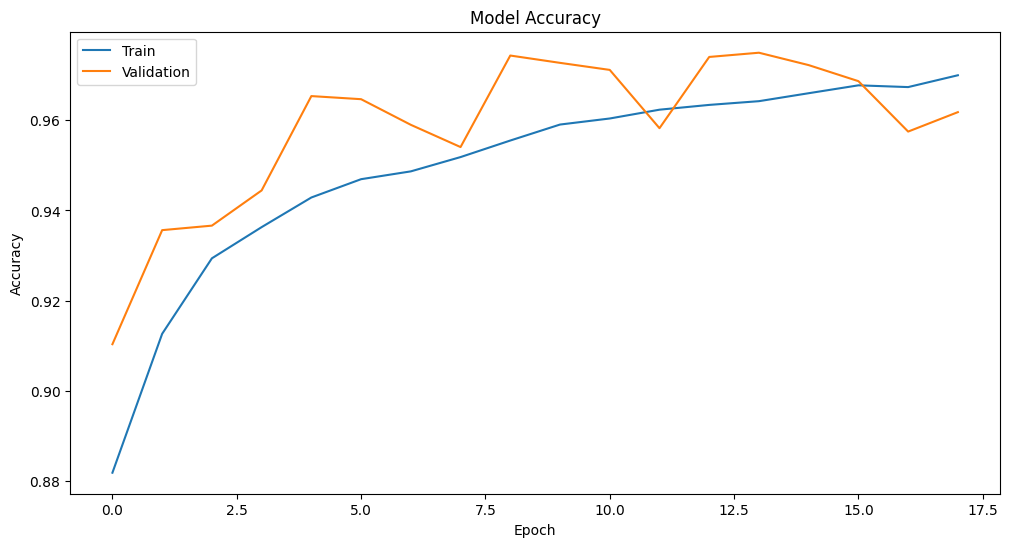

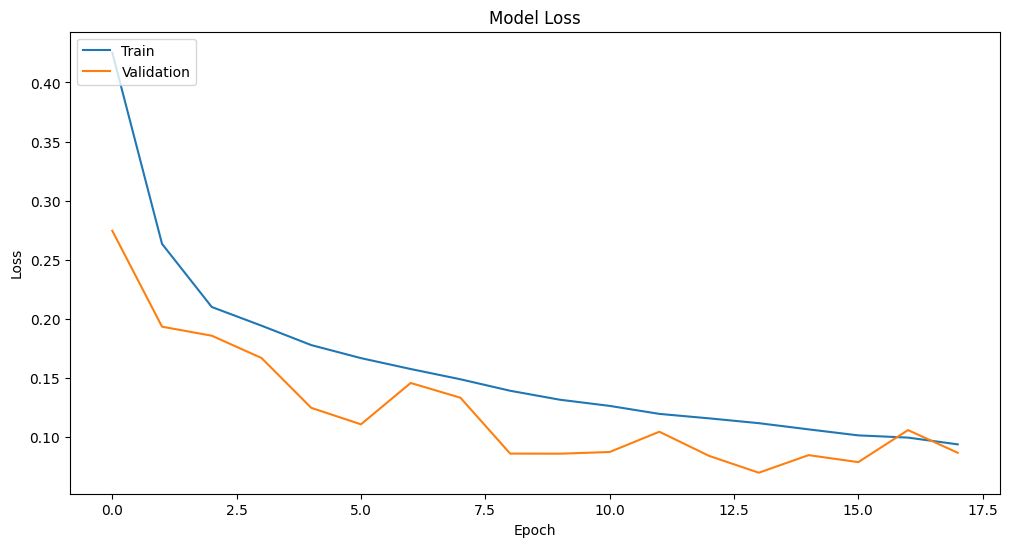

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()